In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import keras.layers as layers
from keras.models import Model
from keras import backend as K
np.random.seed(10)


Using TensorFlow backend.


In [0]:
import tensorflow as tf

In [0]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"

In [0]:
embed = hub.Module(module_url)

# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
messages = [word, sentence, paragraph]

# Reduce logging output.
#tf.logging.set_verbosity(tf.logging.ERROR)

with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(messages))

  for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))
    message_embedding_snippet = ", ".join(
        (str(x) for x in message_embedding[:3]))
    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

INFO:tensorflow:Using /tmp/tfhub_modules to cache modules.
INFO:tensorflow:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/3'.
INFO:tensorflow:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/3'.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
Message: Elephant
Embedding size: 512
Embedding: [0.0449847355485, -0.0574339441955, 0.00221146922559, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.0556801855564, -0.0096079222858, 0.0062462859787, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [0.0387493856251, 0.0765201449394, -0.000794580671936, ...]



In [0]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(session_, input_tensor_, messages_, encoding_tensor):
  message_embeddings_ = session_.run(
      encoding_tensor, feed_dict={input_tensor_: messages_})
  #plot_similarity(messages_, message_embeddings_, 90)

In [0]:
messages = [
    # Smartphones
#    "OnePlus CEO Pete Lau details 'Screen Unlock' feature on OnePlus 6T",
#    "Truecaller launches chat feature to curb spread of fake news",
#    "Cell phone users across the US receive 'Presidential Alert'",

    # Sports
    "Neymar scores hat-trick in PSG's 6-1 win; Messi nets 2 for Barca",
    "Only 10% tickets sold for the 1st Test between India, Windies",
    "18-year-old Shaw youngest India to score century on Test debut",
    
    #Entertainment
    "Sylvester Stallone reveals his look from 'Rambo 5'",
    "What she speaks about is definitely reality: Kajol on Tanushree row",
    "SRK came down to Lungi Dance as I stopped singing for him: Abhijeet"
    

    # Asking about age
#    "Look in mirror to find oil price rise culprit: Putin to Trump",
#    "US ends 1955 treaty with Iran over world court's decision",
#    "Be large-hearted, take other parties along: Akhilesh to Cong",
#    "Will never beg the US to lift sanctions: North Korea",
#    "Madhya Pradesh CM announces INR 100-crore startup fund",
#    "Cong MP Digvijaya Singh a BJP agent, scared of ED, CBI: Mayawati"
]*500



In [0]:
import time
start = time.time()

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  session.run(tf.tables_initializer())
  run_and_plot(session, similarity_input_placeholder, messages,
               similarity_message_encodings)
  
end = time.time()
print(end - start)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
50.520460844


In [0]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from operator import add

np.random.seed(0)
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.initializers import glorot_uniform
np.random.seed(1)

In [0]:
json_data=open('BC_USDT_30min').read()

IOError: ignored

In [0]:
from os import listdir
import os
print os.getcwd()
listdir("/")

/content


['opt',
 'media',
 'sbin',
 'run',
 'usr',
 'mnt',
 'tmp',
 'var',
 'sys',
 'home',
 'dev',
 'bin',
 'boot',
 'lib64',
 'lib',
 'proc',
 'srv',
 'etc',
 'root',
 'content',
 '.dockerenv',
 'colabtools',
 'datalab',
 'tools',
 'lib32']

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
listdir("/content/gdrive/My Drive/Colab Notebooks")

NameError: ignored

In [0]:
json_data=open("/content/gdrive/My Drive/Colab Notebooks/BC_USDT_30min").read()

In [0]:
data = json.loads(json_data)

In [0]:
data[0]

{u'close': 225,
 u'date': 1424372400,
 u'high': 225,
 u'low': 225,
 u'open': 225,
 u'quoteVolume': 0.00444444,
 u'volume': 0.999999,
 u'weightedAverage': 225}

In [0]:
dataF = pd.DataFrame(data)

In [0]:
dataF.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,225.0,1424372400,225.0,225.0,225.0,0.004444,0.999999,225.000000
1,225.0,1424374200,225.0,225.0,225.0,0.000000,0.000000,225.000000
2,240.0,1424376000,240.0,225.0,225.0,0.128625,30.624650,238.092076
3,244.0,1424377800,244.0,244.0,244.0,0.060046,14.651226,244.000000
4,244.0,1424379600,244.0,244.0,244.0,0.000000,0.000000,244.000000


In [0]:
dataF.shape

(61326, 8)

In [0]:
dataF["dateTime"] = map(lambda x:datetime.utcfromtimestamp(x), dataF["date"] )
dataF.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,dateTime
0,225.0,1424372400,225.0,225.0,225.0,0.004444,0.999999,225.000000,2015-02-19 19:00:00
1,225.0,1424374200,225.0,225.0,225.0,0.000000,0.000000,225.000000,2015-02-19 19:30:00
2,240.0,1424376000,240.0,225.0,225.0,0.128625,30.624650,238.092076,2015-02-19 20:00:00
3,244.0,1424377800,244.0,244.0,244.0,0.060046,14.651226,244.000000,2015-02-19 20:30:00
4,244.0,1424379600,244.0,244.0,244.0,0.000000,0.000000,244.000000,2015-02-19 21:00:00


In [0]:
(int(dataF['date'][-1:]) - int(dataF['date'][0:1]))/30/60 + 1

61326

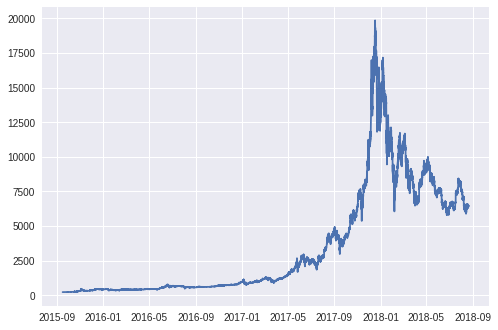

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(dataF["dateTime"][10000:], dataF["weightedAverage"][10000:])
plt.show()

In [0]:
def feature_vector(dataF,num_dim, feature_list, verbose=False, vb_chunk_size = 2000):
    num_rows = dataF.shape[0]
    
    if num_rows < num_dim:
        print ("number of rows less than the dimension expected")
        return 0
    
    num_features = len(feature_list)
    n_C = num_features
    n_H = num_dim
    m = num_rows - num_dim + 1
    dataF_array = np.ndarray([m,n_H,n_C])
    for i in range(m):
        if verbose:
            if i%vb_chunk_size == 0:
                print str(i) + " rows completed"
        for j in range(n_H):
            for k in range(n_C):
                dataF_array[i,j,k] = dataF[feature_list[k]][i + j]
    date_labels = dataF['date'][num_dim:]
                
    return dataF_array, date_labels
    

In [0]:
def feature_vector(dataF,num_dim, feature_list, verbose=False, vb_chunk_size = 2000):
    num_rows = dataF.shape[0]
    
    if num_rows < num_dim:
        print ("number of rows less than the dimension expected")
        return 0
    
    num_features = len(feature_list)
    n_C = num_features
    n_H = num_dim
    m = num_rows - num_dim + 1
    dataF_array = np.ndarray([m,n_H,n_C])
    
    for i in range(m):
        
        if verbose:
            if i%vb_chunk_size == 0:
                print str(i) + " rows completed"
        
        l = dataF[feature_list][i:(i+num_dim)]
        dataF_array[i,:,:]=np.array(l)
        
    date_labels = dataF['date'][(num_dim-1):]
                
    return dataF_array, date_labels

In [0]:
feature_list = ['close','high','low','open','quoteVolume','volume','weightedAverage']
num_dim = 300
dataF_array, date_labels = feature_vector(dataF,num_dim, feature_list, verbose =True)

dataF_array.shape



0 rows completed
2000 rows completed
4000 rows completed
6000 rows completed
8000 rows completed
10000 rows completed
12000 rows completed
14000 rows completed
16000 rows completed
18000 rows completed
20000 rows completed
22000 rows completed
24000 rows completed
26000 rows completed
28000 rows completed
30000 rows completed
32000 rows completed
34000 rows completed
36000 rows completed
38000 rows completed
40000 rows completed
42000 rows completed
44000 rows completed
46000 rows completed
48000 rows completed
50000 rows completed
52000 rows completed
54000 rows completed
56000 rows completed
58000 rows completed
60000 rows completed


(61027, 300, 7)

In [0]:
date_labels.shape

(61027,)

In [0]:
date_labels.head()

299    1424910600
300    1424912400
301    1424914200
302    1424916000
303    1424917800
Name: date, dtype: int64

In [0]:
sum(map(lambda x,y: 1 if x>1.01*y else 0, dataF['high'][10000:], dataF['open'][10000:]))

5516

In [0]:
sum( map(lambda x,y: 1 if x<.99*y else 0, dataF['low'][10000:], dataF['open'][10000:]) )

5769

In [0]:
sum( map(lambda x,y,z: 1 if ((x<.99*y) & (z>1.01*y) ) else 0, dataF['low'][10000:], dataF['open'][10000:], dataF['high'][10000:]) )

647

In [0]:
def y_labels(dataF, highThresh, lowThresh,num_dim, highCol = 'high', lowCol = 'low', openCol = 'open'):
    ind_l = map(lambda x,y: 2 if x< (1 - lowThresh)*y else 0, dataF[lowCol], dataF[openCol]) 
    ind_h = map(lambda x,y: 1 if x> (1 + highThresh)*y else 0, dataF[highCol], dataF[openCol])
    lables = list( map(add, ind_l, ind_h) )    
    return lables[(num_dim):]

In [0]:
yLabels = y_labels(dataF, highThresh = 0.01, lowThresh = 0.01,num_dim = num_dim, highCol = 'high', lowCol = 'low', openCol = 'open')
print yLabels[:5]
print len(yLabels)

[0, 0, 0, 0, 0]
61026


In [0]:
print "number of rows with 0 class " + str(sum([1 if x == 0 else 0 for x in yLabels[10000:]]))
print "number of rows with 1 class " + str(sum([1 if x == 1 else 0 for x in yLabels[10000:]]))
print "number of rows with 2 class " + str(sum([1 if x == 2 else 0 for x in yLabels[10000:]]))
print "number of rows with 3 class " + str(sum([1 if x == 3 else 0 for x in yLabels[10000:]]))

number of rows with 0 class 40392
number of rows with 1 class 4867
number of rows with 2 class 5120
number of rows with 3 class 647


In [0]:
dataF_array_normalized = dataF_array[0:(dataF_array.shape[0] -1), :,:].copy()
rem_list = np.ones(dataF_array_normalized.shape[0], dtype=bool)
for i in range(dataF_array_normalized.shape[0]):
    if ((dataF_array_normalized[i,0,3] ==0) or (dataF_array_normalized[i,0,4] ==0) or (dataF_array_normalized[i,0,5] ==0)):
        rem_list[i]=False
    dataF_array_normalized[i,:,0:3] = dataF_array_normalized[i,:,0:3]/dataF_array_normalized[i,0:1,3:4]
    dataF_array_normalized[i,:,6] = dataF_array_normalized[i,:,6]/dataF_array_normalized[i,0:1,3]
    dataF_array_normalized[i,:,3] = dataF_array_normalized[i,:,3]/dataF_array_normalized[i,0:1,3]
    dataF_array_normalized[i,:,4] = dataF_array_normalized[i,:,4]/dataF_array_normalized[i,0:1,4]
    dataF_array_normalized[i,:,5] = dataF_array_normalized[i,:,5]/dataF_array_normalized[i,0:1,5]
    if np.isnan(dataF_array_normalized[i,:,:]).any():
        rem_list[i]=False

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in divide
  # Remove the CWD from sys.path while we load stuff.


In [0]:
dataF_array_normalized.shape

(61026, 300, 7)

In [0]:
print len(rem_list)
print sum(rem_list)

61026
49804


In [0]:
dataF_array_normalized[-6:-5,0,:]

array([[0.99535851, 1.00351641, 0.99471794, 1.        , 1.        ,
        1.        , 0.99726668]])

In [0]:
print sum(rem_list)
print len(rem_list)
print sum(rem_list[10000:])

49804
61026
48131


In [0]:
a = np.reshape(np.float_(range(24)),(2,3,4) )
b = a.copy()
b[:,:,:2] = np.divide(a[:,:,:2],a[:,0:1,1:2])
print a
print b

[[[ 0.  1.  2.  3.]
  [ 4.  5.  6.  7.]
  [ 8.  9. 10. 11.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]
  [20. 21. 22. 23.]]]
[[[ 0.          1.          2.          3.        ]
  [ 4.          5.          6.          7.        ]
  [ 8.          9.         10.         11.        ]]

 [[ 0.92307692  1.         14.         15.        ]
  [ 1.23076923  1.30769231 18.         19.        ]
  [ 1.53846154  1.61538462 22.         23.        ]]]


In [0]:
print dataF_array_normalized.shape
dataF_array_normalized= dataF_array_normalized[rem_list,:,:]
print dataF_array_normalized.shape

(61026, 300, 7)
(49804, 300, 7)


In [0]:
date_labels = date_labels.reset_index()

In [0]:
date_labels.head()

,index,date
0,299,1424910600
1,300,1424912400
2,301,1424914200
3,302,1424916000
4,303,1424917800


In [0]:
date_labels = date_labels['date']
date_labels.head()

0    1424910600
1    1424912400
2    1424914200
3    1424916000
4    1424917800
Name: date, dtype: int64

In [0]:
date_labels_filtered = date_labels[:-1][rem_list]
date_labels_filtered.shape

(49804,)

In [0]:
print len(rem_list)
print len(yLabels)

61026
61026


In [0]:
yLabels_filtered = []

for m in range(len(rem_list)):
    if rem_list[m]:
        yLabels_filtered.append(yLabels[m])

len(yLabels_filtered)



49804

In [0]:
def LSTM_v1(input_shape):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)
​
    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph, it should be of shape input_shape and dtype 'int32' (as it contains indices).
    series300 = Input(shape = input_shape, dtype='float32')
    
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a batch of sequences.
    X = LSTM(1024,return_sequences=True)(series300)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5) (X)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # Be careful, the returned output should be a single hidden state, not a batch of sequences.
    X = LSTM(1024,return_sequences=False)(X)
    # Add dropout with a probability of 0.5
    X = Dropout(0.5) (X)
    # Propagate X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
    X = Dense(4)(X)
    # Add a softmax activation
    X = Activation('softmax')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=series300,outputs=X)
    
    ### END CODE HERE ###
    
    return model

In [0]:
model1 = LSTM_v1((num_dim,len(feature_list)))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 300, 7)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 300, 1024)         4227072   
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 1024)         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1024)              8392704   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4100      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total para

In [0]:
def LSTM_v2(input_shape2):

  model = tf.keras.models.Sequential()
  #model.add(Input(shape = input_shape, dtype='float32'))
  model.add(tf.keras.layers.LSTM(900,return_sequences=True, input_shape=input_shape2))
  #model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.LSTM(900,return_sequences=False))
  #model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(4))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [0]:
model = LSTM_v2((num_dim,len(feature_list)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300, 900)          3268800   
_________________________________________________________________
lstm_1 (LSTM)                (None, 900)               6483600   
_________________________________________________________________
dense (Dense)                (None, 4)                 3604      
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
Total params: 9,756,004
Trainable params: 9,756,004
Non-trainable params: 0
_________________________________________________________________


In [0]:
import os
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)


INFO:tensorflow:Querying Tensorflow master (grpc://10.12.78.210:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 11301230712344873541)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 16351604455690143845)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_GPU:0, XLA_GPU, 17179869184, 3894047179314640520)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 9012046319262189758)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 8202470572403837219)
INFO:tensorflow:*** Available Device: _DeviceAtt

In [0]:
tpu_model.compile(
    optimizer=tf.train.AdamOptimizer(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['categorical_accuracy']
)



In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [0]:
Y_oh = convert_to_one_hot(np.array(yLabels_filtered), C = 4)

In [0]:
X_train = dataF_array_normalized[:-10000,:,:]
X_test = dataF_array_normalized[-10000:,:,:]
Y_train = Y_oh[:-10000,:]
Y_test = Y_oh[-10000:,:]

In [0]:
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

(39804, 300, 7)
(10000, 300, 7)
(39804, 4)
(10000, 4)


In [0]:
def train_gen(batch_size):
  while True:
    offset = np.random.randint(0, X_train.shape[0] - batch_size)
    yield X_train[offset:offset+batch_size], Y_train[offset:offset + batch_size]
    

In [0]:
import time
start = time.time()

tpu_model.fit_generator(
    train_gen(64),
    epochs=5,
    steps_per_epoch=750,
    validation_data=(X_test, Y_test),
    class_weight = {0:1,1:8,2:8,3:40}
)

end = time.time()
print(end - start)

Epoch 1/5
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(8,), dtype=tf.int32, name=u'core_id_40'), TensorSpec(shape=(8, 300, 7), dtype=tf.float32, name=u'lstm_4_input_10'), TensorSpec(shape=(8, 4), dtype=tf.float32, name=u'activation_2_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for lstm_4_input
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 44.0488660336 secs
INFO:tensorflow:Setting weights on TPU model.
749/750 [============================>.] - ETA: 0s - loss: 0.7175 - categorical_accuracy: 0.7943INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(8,), dtype=tf.int32, name=u'core_id_50'), TensorSpec(shape=(8, 300, 7), dtype=tf.float32, name=u'lstm_4_input_10'), TensorSpec(shape=(8, 4), dtype=tf.float32, name=u'activation_2_target_10')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Rem

In [0]:
cpu_model = tpu_model.sync_to_cpu()

INFO:tensorflow:Copying TPU weights to the CPU


In [0]:
pred = cpu_model.predict(X_test)
pred

array([[0.75540286, 0.11772798, 0.11429932, 0.01256985],
       [0.754356  , 0.11902273, 0.11366335, 0.0129578 ],
       [0.7558195 , 0.11768091, 0.11365362, 0.01284598],
       ...,
       [0.75511926, 0.11751613, 0.11487626, 0.01248827],
       [0.7552632 , 0.11768901, 0.11450414, 0.01254372],
       [0.7548958 , 0.11821795, 0.11413296, 0.01275336]], dtype=float32)

In [0]:
pred_class=[]
for i in range(len(pred)):
    pred_class.append(np.argmax(pred[i]))
pred_class[:5]

[0, 0, 0, 0, 0]

In [0]:
print "number of 0 labels " + str(sum(map(lambda x: 1 if x==0 else 0, yLabels_filtered[:-10000] )))
print "number of 1 labels " + str(sum(map(lambda x: 1 if x==1 else 0, yLabels_filtered[:-10000] )))
print "number of 2 labels " + str(sum(map(lambda x: 1 if x==2 else 0, yLabels_filtered[:-10000] )))
print "number of 3 labels " + str(sum(map(lambda x: 1 if x==3 else 0, yLabels_filtered[:-10000] )))

number of 0 labels 31571
number of 1 labels 3782
number of 2 labels 3895
number of 3 labels 556


In [0]:
print 29326.0/len(yLabels_filtered[:-10000])
print 3635.0/len(yLabels_filtered[:-10000])
print 3793.0/len(yLabels_filtered[:-10000])
print 539.0/len(yLabels_filtered[:-10000])

0.736760124611
0.0913224801527
0.0952919304593
0.0135413526279


In [0]:
print "number of 0 labels " + str(sum(map(lambda x: 1 if x==0 else 0, pred_class )))
print "number of 1 labels " + str(sum(map(lambda x: 1 if x==1 else 0, pred_class )))
print "number of 2 labels " + str(sum(map(lambda x: 1 if x==2 else 0, pred_class )))
print "number of 3 labels " + str(sum(map(lambda x: 1 if x==3 else 0, pred_class )))

number of 0 labels 10000
number of 1 labels 0
number of 2 labels 0
number of 3 labels 0


In [0]:
yLabels_filtered[-10000:]
print "number of 0 labels " + str(sum(map(lambda x: 1 if x==0 else 0, yLabels_filtered[-10000:] )))
print "number of 1 labels " + str(sum(map(lambda x: 1 if x==1 else 0, yLabels_filtered[-10000:] )))
print "number of 2 labels " + str(sum(map(lambda x: 1 if x==2 else 0, yLabels_filtered[-10000:] )))
print "number of 3 labels " + str(sum(map(lambda x: 1 if x==3 else 0, yLabels_filtered[-10000:] )))

number of 0 labels 8024
number of 1 labels 867
number of 2 labels 1038
number of 3 labels 71


In [0]:
pred_0_class = pred[:,0]

In [0]:
pred_1_class = pred[:,1]

In [0]:
pred_0_class

array([0.75540286, 0.754356  , 0.7558195 , ..., 0.75511926, 0.7552632 ,
       0.7548958 ], dtype=float32)

In [0]:
pred_non_0_class = 1 - pred_0_class

In [0]:
pred_non_0_class

array([0.24459714, 0.24564397, 0.2441805 , ..., 0.24488074, 0.24473679,
       0.2451042 ], dtype=float32)

In [0]:
yLabels_filtered_non_0_class = [0 if x == 0 else 1 for x in yLabels_filtered[-10000:]]

In [0]:
yLabels_filtered_1_class = [1 if x == 1 else 0 for x in yLabels_filtered[-10000:]]

In [0]:
print min(yLabels_filtered_non_0_class)
print max(yLabels_filtered_non_0_class)
print sum(yLabels_filtered_non_0_class)

0
1
1976


In [0]:
print min(yLabels_filtered_1_class)
print max(yLabels_filtered_1_class)
print sum(yLabels_filtered_1_class)

0
1
867


In [0]:
pred_non_0_class_list = list(pred_non_0_class)

In [0]:
pred_1_class_list = list(pred_1_class)

In [0]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
m = precision_recall_curve(yLabels_filtered_non_0_class, pred_non_0_class_list)
m_1 = precision_recall_curve(yLabels_filtered_1_class, pred_1_class_list)

In [0]:
m

(array([0.1976593 , 0.19757903, 0.1975988 , ..., 0.        , 0.        ,
        1.        ]),
 array([1.        , 0.99949393, 0.99949393, ..., 0.        , 0.        ,
        0.        ]),
 array([0.24192548, 0.2419433 , 0.24194866, ..., 0.28920233, 0.2981143 ,
        0.3083095 ], dtype=float32))

In [0]:
m_1

(array([0.08686504, 0.08677355, 0.08678224, ..., 0.        , 0.        ,
        1.        ]),
 array([1.       , 0.9988466, 0.9988466, ..., 0.       , 0.       ,
        0.       ]),
 array([0.11526732, 0.1152778 , 0.11528911, ..., 0.15658648, 0.15685368,
        0.15890971], dtype=float32))

In [0]:
x = m[1]
y = m[0]
            
print auc(x, y)

0.2444248351850238


In [0]:
x_1 = m_1[1]
y_1 = m_1[0]
print auc(x_1, y_1)

0.09929812958033951


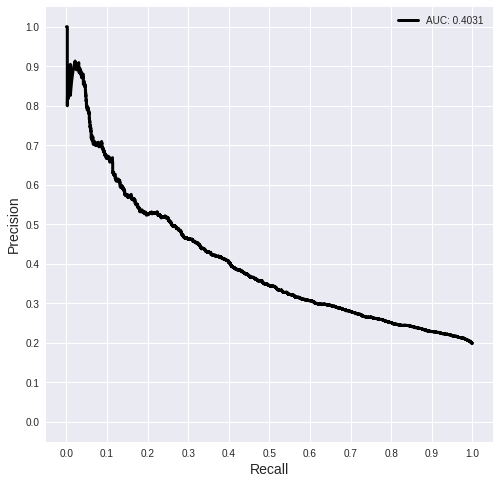

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
xlabel = 'Recall'
ylabel = 'Precision'
ax.plot(x, y, lw=3, color='k', label='AUC: %.4f' % ( auc(x, y)))

ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)

ax.legend(loc='best', fontsize=10)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))

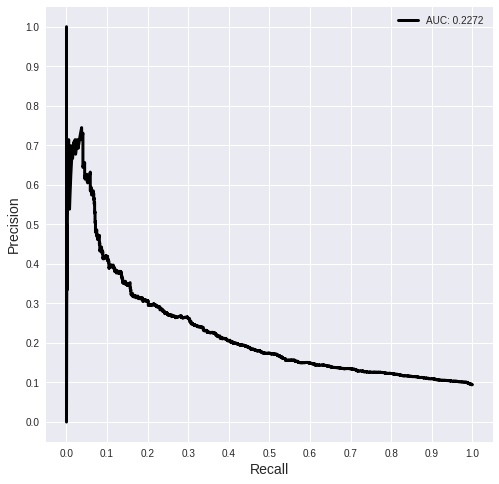

In [0]:
pred_1_class = pred[:,1] + pred[:,3]
pred_1_class_list = list(pred_1_class)
yLabels_filtered_1_class = [1 if ((t == 1) or (t == 3)) else 0 for t in yLabels_filtered[-10000:]]
m_1 = precision_recall_curve(yLabels_filtered_1_class, pred_1_class_list)
x_1 = m_1[1]
y_1 = m_1[0]

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
xlabel = 'Recall'
ylabel = 'Precision'
ax.plot(x_1, y_1, lw=3, color='k', label='AUC: %.4f' % ( auc(x_1, y_1)))

ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)

ax.legend(loc='best', fontsize=10)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))

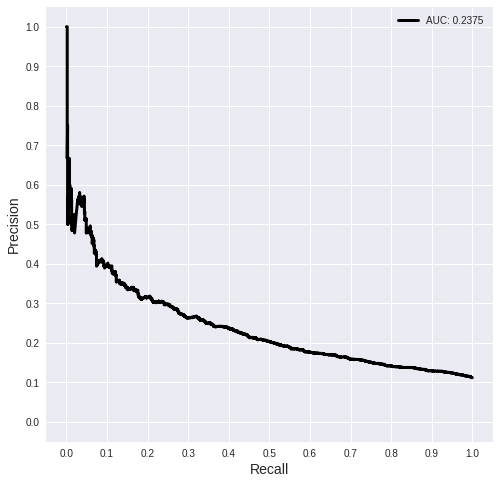

In [0]:
pred_2_class = pred[:,2] + pred[:,3]
pred_2_class_list = list(pred_2_class)
yLabels_filtered_2_class = [1 if ((t == 2) or (t == 3))  else 0 for t in yLabels_filtered[-10000:]]
m_2 = precision_recall_curve(yLabels_filtered_2_class, pred_2_class_list)
x_2 = m_2[1]
y_2 = m_2[0]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
xlabel = 'Recall'
ylabel = 'Precision'
ax.plot(x_2, y_2, lw=3, color='k', label='AUC: %.4f' % ( auc(x_2, y_2)))

ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)

ax.legend(loc='best', fontsize=10)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))

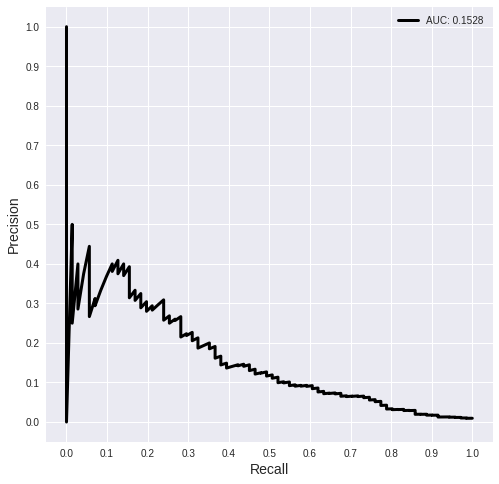

In [0]:
pred_3_class = pred[:,3]
pred_3_class_list = list(pred_3_class)
yLabels_filtered_3_class = [1 if t == 3 else 0 for t in yLabels_filtered[-10000:]]
m_3 = precision_recall_curve(yLabels_filtered_3_class, pred_3_class_list)
x_3 = m_3[1]
y_3 = m_3[0]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
xlabel = 'Recall'
ylabel = 'Precision'
ax.plot(x_3, y_3, lw=3, color='k', label='AUC: %.4f' % ( auc(x_3, y_3)))

ax.set_xlabel(xlabel, fontsize=14)
ax.set_ylabel(ylabel, fontsize=14)

ax.legend(loc='best', fontsize=10)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.05, 1.05)
ax.set_xticks(np.linspace(0, 1, 11))
ax.set_yticks(np.linspace(0, 1, 11))

NameError: ignored